## Classified Unique PCA 

In [2]:
from sklearn.cluster import KMeans
import time

import math
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import matplotlib

from sklearn.cluster import AgglomerativeClustering
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.decomposition import PCA

In [3]:
good_tani = np.fromfile("/home/joseph/xia_lab/binary_data/good_tani.dat", count=(20134*20134))

In [4]:
jsob_file = open("/home/joseph/xia_lab/class_indices.txt", 'r')
good_labels = []
lineas = jsob_file.readlines()
for ine in lineas:
  good_labels.append(int(ine))

In [5]:
#int_f = open("/home/joseph/Desktop/HELP.txt", 'w')
#for i in range(len(good_labels)):
#  int_f.write(str(good_labels[i])+ "\n")
#int_f.close()

In [6]:
good_labels = np.asarray(good_labels)
good_labels = good_labels -1

good_tani_2d = np.reshape( good_tani, (20134,20134) )

In [7]:
before = time.time()
pca = PCA(n_components=2)

pca.fit(good_tani_2d)
after = time.time()

In [8]:
good_noms = ["Organic acids", "Fatty Acyls", "Sterol Lipids", "Nucleic acids", "Organoheterocyclic compounds", "Benzenoids", "Carbohydrates", "Organic nitrogen compounds", "Organic oxygen compounds", "Mixed metal/non-metal compounds", "Sphingolipids", "Prenol Lipids", "Polyketides", "Glycerolipids", "Glycerophospholipids", "Alkaloids", "Organic acids and derivatives", "Homogeneous non-metal compounds", "Organosulfur compounds", "Lignans", "Carbides", "Organohalogen compounds", "Organometallic compounds", "Organophosphorus compounds", "Organic Polymers", "Hydrocarbons", "Fatty acyls","Hydrocarbon derivatives"]


pcs = pca.transform(good_tani_2d)

pcxs = []
pcys = []

for i in range(len(good_noms)):
  pcxs.append([])
  pcys.append([])

for i in range(len(good_labels)):
  pcxs[good_labels[i]].append(pcs[i,0])
  pcys[good_labels[i]].append(pcs[i,1])

scat = []


In [9]:
pca.explained_variance_ratio_

array([0.45627241, 0.20628039])

In [10]:
0.45627241 + 0.20628039

0.6625528

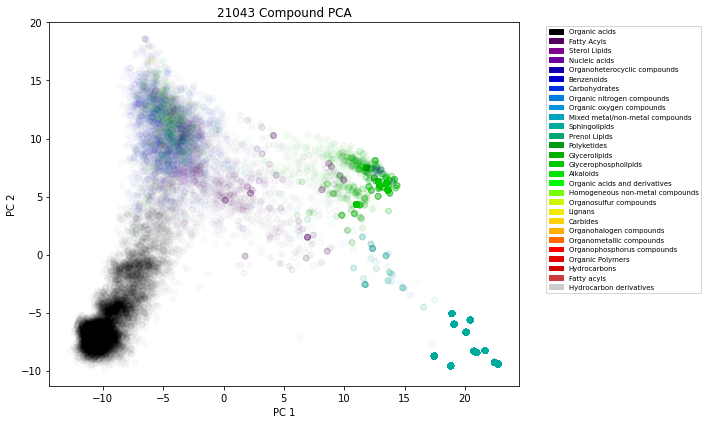

In [50]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)

normy = plt.Normalize(vmin=0, vmax=27)
cmap = matplotlib.cm.get_cmap("nipy_spectral")

ptches = []
for i in range(len(good_noms)):
  ptches.append(mpatches.Patch( color=cmap(normy(i)), label=good_noms[i]))


for i in range(len(good_noms)):
  scat.append( ax.scatter(pcxs[i], pcys[i], c=[i for ind in range((len(pcys[i])))], norm = plt.Normalize(vmin=0, vmax=27), cmap="nipy_spectral"))#, label = good_noms[i]))

#c=[i%2 for i in range(len(pcs[:,0]))])#, alpha=0.02)
#lege = ax.legend(*scat.legend_elements())#, [good_noms[i] for i in range(28)])#ax.legend(labels=good_noms) #
#ax.add_artist(lege)
ax.legend(handles=ptches, fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')#(scat, good_noms)
for i in range(len(scat)):
  scat[i].set_alpha(0.02)
ax.set_title("21043 Compound PCA")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
plt.tight_layout()
fig.savefig("/home/joseph/Desktop/try_pca_svm.png", dpi=400)


In [12]:
from sklearn import svm
from matplotlib.colors import ListedColormap

In [13]:
good_noms[10]

'Sphingolipids'

In [14]:
is_organic_acid_lab = [ 1 if lab==0 else 0 for lab in good_labels ]

In [15]:
oacidsvc_model = svm.SVC()
oacidsvc_model.fit([ com for com in  pcs ], is_organic_acid_lab)

SVC()

In [16]:
x_min = np.min( [pcs[i,0] for i in range(len(pcs))])
x_max = np.max( [pcs[i,0] for i in range(len(pcs))])

y_min = np.min( [pcs[i,1] for i in range(len(pcs))])
y_max = np.max( [pcs[i,1] for i in range(len(pcs))])

In [17]:
grid_spacing = 0.01
#we have to prepare a decision mesh to plot the decision boundary
mesh_x, mesh_y = np.meshgrid(np.arange(x_min,x_max, grid_spacing), np.arange(y_min, y_max, grid_spacing))

Z = oacidsvc_model.decision_function( np.c_[mesh_x.ravel(), mesh_y.ravel()] )

Z = Z.reshape(mesh_x.shape)

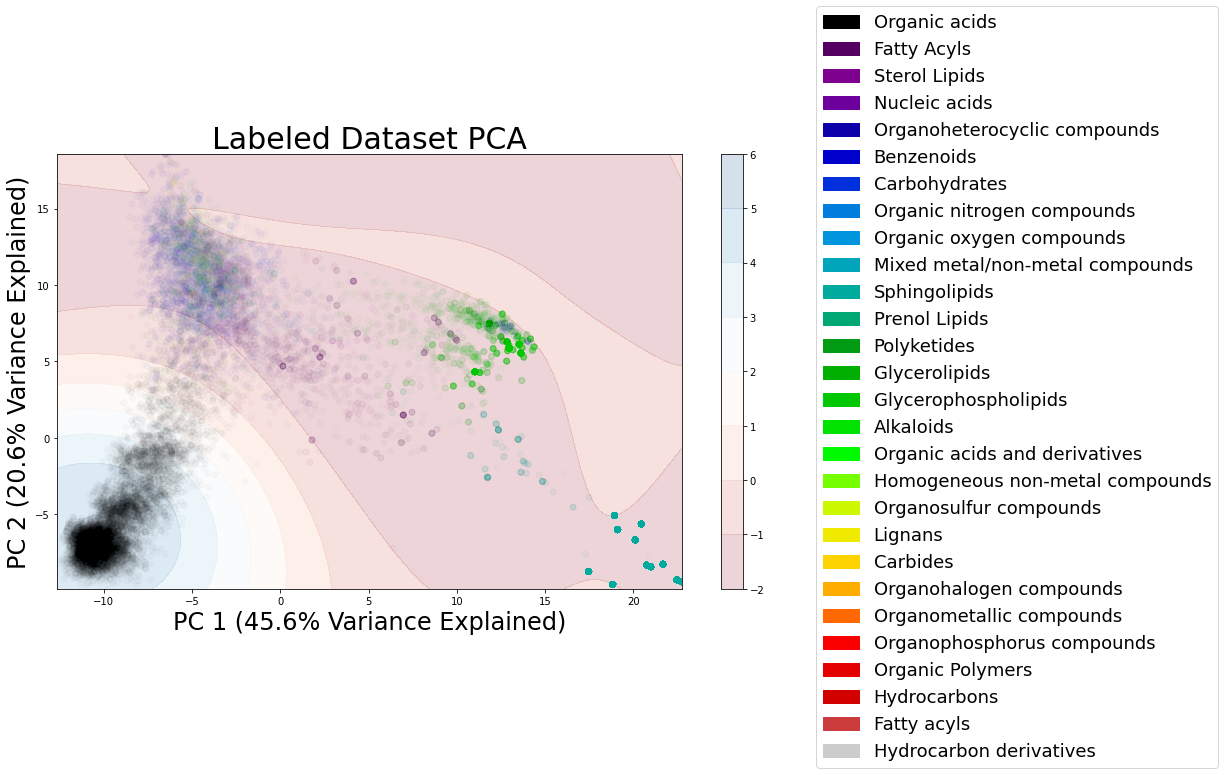

In [80]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig = plt.figure(figsize=(14,8))
ax=fig.add_subplot(1,1,1)

kappa = ax.contourf(mesh_x, mesh_y, Z, cmap = cm, alpha = 0.175)

normy = plt.Normalize(vmin=0, vmax=27)
cmap = matplotlib.cm.get_cmap("nipy_spectral")

ptches = []
for i in range(len(good_noms)):
  ptches.append(mpatches.Patch( color=cmap(normy(i)), label=good_noms[i]))


for i in range(len(good_noms)):
  scat.append( ax.scatter(pcxs[i], pcys[i], c=[i for ind in range((len(pcys[i])))], norm = plt.Normalize(vmin=0, vmax=27), cmap="nipy_spectral"))#, label = good_noms[i]))

#c=[i%2 for i in range(len(pcs[:,0]))])#, alpha=0.02)
#lege = ax.legend(*scat.legend_elements())#, [good_noms[i] for i in range(28)])#ax.legend(labels=good_noms) #
#ax.add_artist(lege)
ax.legend(handles=ptches, fontsize=18, bbox_to_anchor=(1.2, 1.36), loc='upper left')#(scat, good_noms)
for i in range(len(scat)):
  scat[i].set_alpha(0.02)
ax.set_title("Labeled Dataset PCA", fontsize=30)
ax.set_xlabel("PC 1 (45.6% Variance Explained)", fontsize=24)
ax.set_ylabel("PC 2 (20.6% Variance Explained)", fontsize=24)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


fig.colorbar(kappa)
#plt.tight_layout()
fig.savefig("/home/joseph/Desktop/try_pca_svm.png", dpi=400)

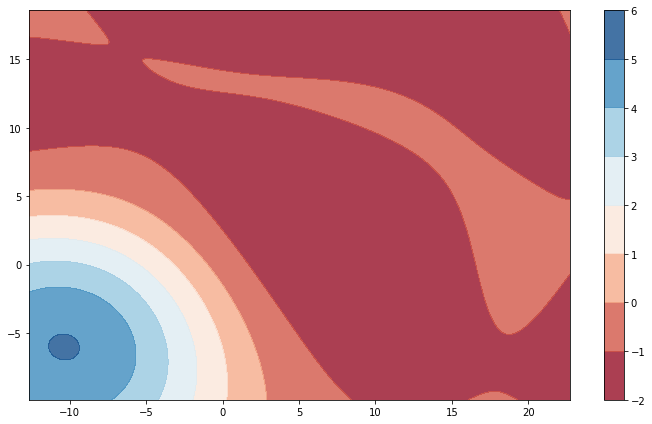

In [19]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)

kappa = ax.contourf(mesh_x, mesh_y, Z, cmap = cm, alpha = 0.8)
fig.colorbar(kappa)

plt.tight_layout()
fig.savefig("/home/joseph/Desktop/oacid_svm.png", dpi=400)

In [20]:
bt5 = []

for i in range(len(good_labels)):
    if (oacidsvc_model.decision_function([pcs[i]])[0] > 5 and good_labels[i] !=0 ):
        bt5.append(i)
        
bt4 = []

for i in range(len(good_labels)):
    if (oacidsvc_model.decision_function([pcs[i]])[0] > 4 and good_labels[i] !=0 ):
        bt4.append(i)
bt3 = []

for i in range(len(good_labels)):
    if (oacidsvc_model.decision_function([pcs[i]])[0] > 3 and good_labels[i] !=0 ):
        bt3.append(i)
        
bt2 = []

for i in range(len(good_labels)):
    if (oacidsvc_model.decision_function([pcs[i]])[0] > 2 and good_labels[i] !=0 ):
        bt2.append(i)

bt1= []

for i in range(len(good_labels)):
    if (oacidsvc_model.decision_function([pcs[i]])[0] > 1 and good_labels[i] !=0 ):
        bt1.append(i)

bt0= []

for i in range(len(good_labels)):
    if (oacidsvc_model.decision_function([pcs[i]])[0] > 0 and good_labels[i] !=0 ):
        bt0.append(i)

In [21]:
print(len(bt5))
#print(bt5)
print(len(bt4))
#print(bt4)
print(len(bt3))
#print(bt3)
print(len(bt2))
#print(bt2)
print(len(bt1))
#print(bt1)
print(len(bt0))
#print(bt0)

0
0
1
3
23
86


In [22]:
false_organic_acids = []

for i in range(len(good_labels)):
    if (good_labels[i]!=0 and pcs[i,0] < -1.0 and pcs[i,1] < 1.0):
        print("Sample "+str(i)+" is a "+ good_noms[good_labels[i]]+ " mixed within the organic acids with score" + str(oacidsvc_model.decision_function([pcs[i]])))
        print(pcs[i])
        false_organic_acids.append(i)

print(len(false_organic_acids))

Sample 757 is a Fatty Acyls mixed within the organic acids with score[1.4214218]
[-3.00461743 -1.27715398]
Sample 2053 is a Fatty Acyls mixed within the organic acids with score[1.36327756]
[-4.81416246  0.76011811]
Sample 4923 is a Fatty Acyls mixed within the organic acids with score[0.67533583]
[-1.27310257 -1.68463396]
Sample 5758 is a Benzenoids mixed within the organic acids with score[3.36561884]
[-7.56377835 -1.28498897]
Sample 13477 is a Fatty Acyls mixed within the organic acids with score[0.43507815]
[-2.67225264  0.84895488]
Sample 13908 is a Organic Polymers mixed within the organic acids with score[2.86908344]
[-7.73795423 -0.23088193]
Sample 14471 is a Benzenoids mixed within the organic acids with score[2.2884331]
[-7.36072351  0.63788382]
7


In [23]:
false_organic_acids = []
false_others = []
threshes = [2.0, 1.5, 1.25, 1.0, 0.75, 0.50, 0.25, 0.0, -0.15, -0.25, -0.5, -1.0]

fp_lists = []
fn_lists = []

for thresh in threshes:
    new_fp_list = []
    new_fn_list = []
    for i in range(len(good_labels)):
        if (oacidsvc_model.decision_function([pcs[i]]) > thresh and good_labels[i]!=0 ):
            #print("Sample "+str(i)+" is a "+ good_noms[good_labels[i]]+ " mixed within the organic acids with score" + str(oacidsvc_model.decision_function([pcs[i]])))
            #print(pcs[i])
            #false_organic_acids.append(i)
            new_fp_list.append(i)
        if (oacidsvc_model.decision_function([pcs[i]]) < thresh and good_labels[i]==0):
            #false_others.append(i)
            new_fn_list.append(i)
    fp_lists.append(new_fp_list)
    fn_lists.append(new_fn_list)

for l in range(len(fp_lists)):
    print(str(threshes[l])+" threshold "+str(len(fp_lists[l]))+" false acids and "+str(len(fn_lists[l]))+" false others")
#print(str(len(false_organic_acids))+"false acids and "+str(len(false_others))+" false others")

2.0 threshold 3 false acids and 885 false others
1.5 threshold 13 false acids and 782 false others
1.25 threshold 18 false acids and 724 false others
1.0 threshold 23 false acids and 656 false others
0.75 threshold 32 false acids and 605 false others
0.5 threshold 46 false acids and 551 false others
0.25 threshold 61 false acids and 495 false others
0.0 threshold 86 false acids and 454 false others
-0.15 threshold 114 false acids and 426 false others
-0.25 threshold 133 false acids and 406 false others
-0.5 threshold 198 false acids and 364 false others
-1.0 threshold 653 false acids and 245 false others


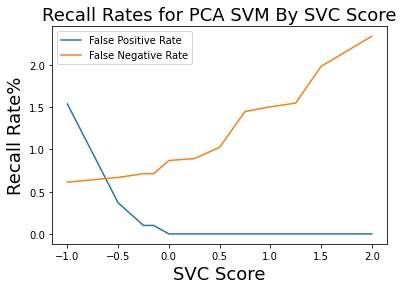

In [68]:
fig, ax = plt.subplots()
ax.plot(threshes, [len(fp_lists[i]) /89.72 for i in range(len(fp_lists)) ], label="False Positive Rate")
ax.plot(threshes, [len(fn_lists[i]) /89.72 for i in range(len(fp_lists)) ], label="False Negative Rate")
ax.set_title("Recall Rates for PCA SVM By SVC Score", fontsize=18)
ax.set_ylabel("Recall Rate%", fontsize=18)
ax.set_xlabel("SVC Score", fontsize=18)
plt.legend()
plt.savefig("/home/joseph/Desktop/svc_scores.png")

In [25]:
is_sphingolipid_lab = [ 1 if lab==10 else 0 for lab in good_labels ]

In [26]:
sphl_model = svm.SVC()
sphl_model.fit([ com for com in  pcs ], is_sphingolipid_lab)

SVC()

In [27]:
sphlZ = sphl_model.decision_function( np.c_[mesh_x.ravel(), mesh_y.ravel()] )

sphlZ = sphlZ.reshape(mesh_x.shape)

In [28]:
print(np.max(sphlZ))
print(np.min(sphlZ))

4.24625577045118
-3.2756842974642693


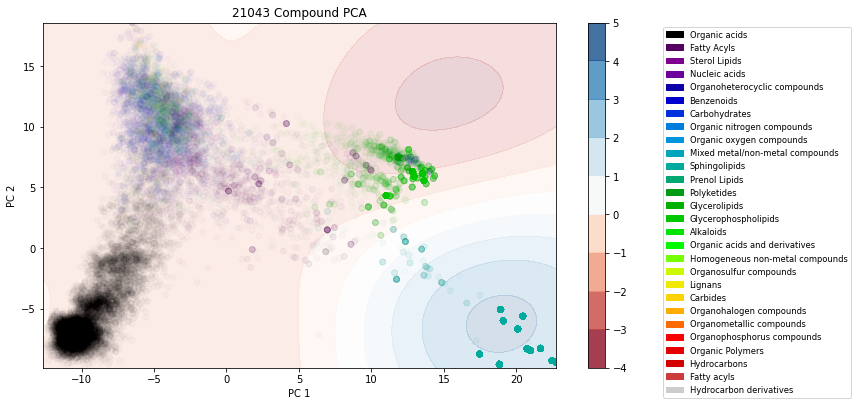

In [41]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig = plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,1,1)

ax.contourf(mesh_x, mesh_y, sphlZ, cmap = cm, alpha = 0.175)

normy = plt.Normalize(vmin=0, vmax=27)
cmap = matplotlib.cm.get_cmap("nipy_spectral")

ptches = []
for i in range(len(good_noms)):
  ptches.append(mpatches.Patch( color=cmap(normy(i)), label=good_noms[i]))


for i in range(len(good_noms)):
  scat.append( ax.scatter(pcxs[i], pcys[i], c=[i for ind in range((len(pcys[i])))], norm = plt.Normalize(vmin=0, vmax=27), cmap="nipy_spectral"))#, label = good_noms[i]))

#c=[i%2 for i in range(len(pcs[:,0]))])#, alpha=0.02)
#lege = ax.legend(*scat.legend_elements())#, [good_noms[i] for i in range(28)])#ax.legend(labels=good_noms) #
#ax.add_artist(lege)
ax.legend(handles=ptches, fontsize='small', bbox_to_anchor=(1.2, 1), loc='upper left')#(scat, good_noms)
for i in range(len(scat)):
  scat[i].set_alpha(0.02)
ax.set_title("21043 Compound PCA")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

fig.colorbar(kappa)

plt.tight_layout()
fig.savefig("/home/joseph/Desktop/sphl_svm.png", dpi=400)

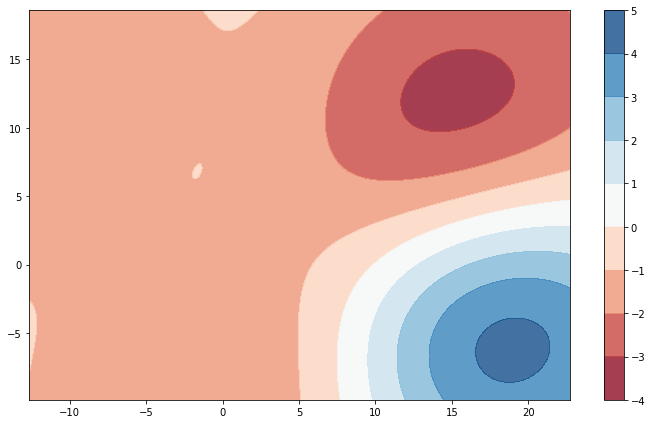

In [30]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)

kappa = ax.contourf(mesh_x, mesh_y, sphlZ, cmap = cm, alpha = 0.8)
fig.colorbar(kappa)

plt.tight_layout()
fig.savefig("/home/joseph/Desktop/sphl_svm.png", dpi=400)

In [31]:
bt3 = []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > 3 and good_labels[i] !=10 ):
        bt3.append(i)
        
bt2 = []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > 2 and good_labels[i] !=10 ):
        bt2.append(i)

bt1= []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > 1 and good_labels[i] !=10 ):
        bt1.append(i)

bt0= []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > 0 and good_labels[i] !=10 ):
        bt0.append(i)
        
btn1= []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > -1 and good_labels[i] !=10 ):
        btn1.append(i)
        
        
inbt3 = []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > 3 and good_labels[i] ==10 ):
        inbt3.append(i)
        
inbt2 = []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > 2 and good_labels[i] ==10 ):
        inbt2.append(i)

inbt1= []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > 1 and good_labels[i] ==10 ):
        inbt1.append(i)

inbt0= []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > 0 and good_labels[i] ==10 ):
        inbt0.append(i)
        
inbtn1= []

for i in range(len(good_labels)):
    if (sphl_model.decision_function([pcs[i]])[0] > -1 and good_labels[i] ==10 ):
        inbtn1.append(i)

In [32]:
print(len(bt3))
#print(bt3)
print(len(bt2))
#print(bt2)
print(len(bt1))
#print(bt1)
print(len(bt0))
#print(bt0)
print(len(btn1))
print(" ")
print(str(len(inbt3)) +" "+ str(len(inbt3)/3248) )
#print(bt3)
print(str(len(inbt2)) +" "+ str(len(inbt2)/3248) )
#print(bt2)
print(str(len(inbt1)) +" "+ str(len(inbt1)/3248) )
#print(bt1)
print(str(len(inbt0)) +" "+ str(len(inbt0)/3248) )
#print(bt0)
print(str(len(inbtn1)) +" "+ str(len(inbtn1)/3248) )

0
0
0
0
138
 
2980 0.9174876847290641
3038 0.9353448275862069
3113 0.958435960591133
3170 0.9759852216748769
3193 0.9830665024630542


In [33]:
false_organic_acids = []
false_others = []
threshes = [2.0, 1.5, 1.25, 1.0, 0.75, 0.50, 0.25, 0.0, -0.15, -0.25, -0.5, -1.0]

fp_lists = []
fn_lists = []

for thresh in threshes:
    new_fp_list = []
    new_fn_list = []
    for i in range(len(good_labels)):
        if (sphl_model.decision_function([pcs[i]]) > thresh and good_labels[i]!=10 ):
            #print("Sample "+str(i)+" is a "+ good_noms[good_labels[i]]+ " mixed within the organic acids with score" + str(oacidsvc_model.decision_function([pcs[i]])))
            #print(pcs[i])
            #false_organic_acids.append(i)
            new_fp_list.append(i)
        if (sphl_model.decision_function([pcs[i]]) < thresh and good_labels[i]==10):
            #false_others.append(i)
            new_fn_list.append(i)
    fp_lists.append(new_fp_list)
    fn_lists.append(new_fn_list)

for l in range(len(fp_lists)):
    print(str(threshes[l])+" threshold "+str(len(fp_lists[l]))+" false Sphingolipids and "+str(len(fn_lists[l]))+" false others")
#print(str(len(false_organic_acids))+"false acids and "+str(len(false_others))+" false others")

2.0 threshold 0 false Sphingolipids and 210 false others
1.5 threshold 0 false Sphingolipids and 178 false others
1.25 threshold 0 false Sphingolipids and 139 false others
1.0 threshold 0 false Sphingolipids and 135 false others
0.75 threshold 0 false Sphingolipids and 130 false others
0.5 threshold 0 false Sphingolipids and 92 false others
0.25 threshold 0 false Sphingolipids and 80 false others
0.0 threshold 0 false Sphingolipids and 78 false others
-0.15 threshold 9 false Sphingolipids and 64 false others
-0.25 threshold 9 false Sphingolipids and 64 false others
-0.5 threshold 33 false Sphingolipids and 60 false others
-1.0 threshold 138 false Sphingolipids and 55 false others


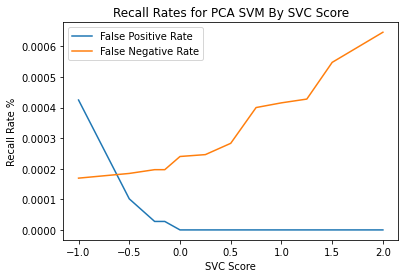

In [34]:
fig, ax = plt.subplots()
ax.plot(threshes, [len(fp_lists[i]) /324800 for i in range(len(fp_lists)) ], label="False Positive Rate")
ax.plot(threshes, [len(fn_lists[i]) /324800 for i in range(len(fp_lists)) ], label="False Negative Rate")
ax.set_title("Recall Rates for PCA SVM By SVC Score")
ax.set_ylabel("Recall Rate %")
ax.set_xlabel("SVC Score")
plt.legend()
plt.savefig("/home/joseph/Desktop/sphlsvc_scores.png")

In [35]:
labs = np.asarray(good_labels)

np.max(labs)

#label_groups = [ for lab in good_labels ]

27

In [36]:
groups = [ [] for i in range(28) ]

for i in range(len(good_labels)):
    groups[good_labels[i]].append(i)


In [37]:
sizes = [ len(i) for i in groups ]

In [38]:
sizes

[8972,
 1172,
 437,
 268,
 764,
 1007,
 203,
 102,
 244,
 1,
 3248,
 382,
 402,
 465,
 2252,
 111,
 2,
 5,
 31,
 19,
 1,
 28,
 4,
 4,
 2,
 5,
 1,
 2]